### Exercise
Plot the train/test performace against the number of hidden nodes, H.

**Hint**
You should loop over enough neurons to make a decent plot.  However, if you make $H$ too big then it will take a long time to get a solution.  Choosing $H = [2, 4, 6, 8, 10]$ may be a good place to start.  You may want to try a larger list at some point in your free time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score as r2

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.exp(-x * x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
Train_R2=[]
Test_R2=[]
H_range=[2,4,6,8,10,12,14,16,18,20]
# H = 2 # number of nodes in the layer
for H in H_range:
    input_dim = 1 # input dimension: just xc

    model = models.Sequential() # create sequential multi-layer perceptron

    # layer 0, our hidden layer
    model.add(layers.Dense(H, input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='sigmoid')) 
    # layer 1
    model.add(layers.Dense(1, kernel_initializer='normal', 
                    activation='linear'))

    # configure the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit the model
    model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

    # use our model to predict in the range we want
    # X_range = np.linspace(-5, 5, 1000)
    # y_pred = model.predict(X_range)

    # fig, ax = plt.subplots(1, 1, figsize=(14,8))
    # ax.scatter(X_train, Y_train, label='Training data')
    # ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
    # ax.set_xlabel(r'$X$', fontsize=20)
    # ax.set_ylabel(r'$Y$', fontsize=20)
    # ax.set_title('Toy data set for regression', fontsize=24)
    # ax.tick_params(labelsize=20)

    # ax.legend(loc=1, fontsize=20)

    # plt.show()

    # evaluate the training and testing performance of your model 
    # note: you should extract and check both the loss function and your evaluation metric
    # from sklearn.metrics import r2_score as r2

    train_score = model.evaluate(X_train, Y_train, verbose=1)
    print('Train loss:', train_score)
    print('Train R2:', r2(Y_train, model.predict(X_train)))
    Train_R2.append(r2(Y_train, model.predict(X_train)))

    test_score = model.evaluate(X_test, Y_test, verbose=1)
    print('Test loss:', test_score)
    print('Test R2:', r2(Y_test, model.predict(X_test)))
    Test_R2.append(r2(Y_test, model.predict(X_test)))

InternalError: GPU sync failed

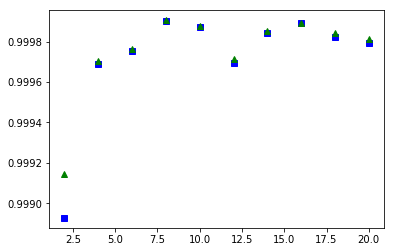

In [11]:
plt.plot(H_range,Train_R2,'bs',
        H_range,Test_R2,'g^')
plt.show()